In [47]:
%pylab inline
import pandas as pd
from mpl_toolkits.axes_grid.inset_locator import inset_axes

Populating the interactive namespace from numpy and matplotlib


In [48]:
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

def xpercent_scale():
    gca().set_xticklabels(['{:.0f}%'.format(x*100) for x in gca().get_xticks()])

In [49]:
sample_info = pd.read_csv('middle_sample_info.csv', index_col=0)
results = pd.read_csv('middle_final_results.csv', index_col=0)
ms_results = pd.read_csv('middle_MS_results.csv', index_col=0)

In [50]:
df = pd.read_csv('data/rep6/middle_exp_mat.csv', index_col=0)
df = df.loc[sample_info.index]
df = df.T[df.sum(0) >= 3].T  # Filter practically unobserved genes

dfm = np.log10(df + 1)

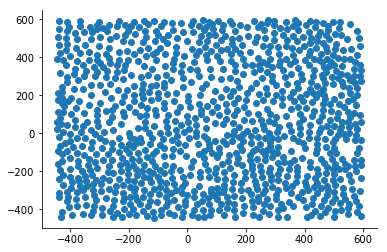

In [51]:
figsize(6, 4)
plt.scatter(sample_info.abs_X, sample_info.abs_Y);

In [52]:
results['pval'] = results['pval'].clip_lower(results.query('pval > 0')['pval'].min() / 2)
results['qval'] = results['qval'].clip_lower(results.query('qval > 0')['qval'].min() / 2)
ms_results['pval'] = ms_results['pval'].clip_lower(ms_results.query('pval > 0')['pval'].min() / 2)
ms_results['qval'] = ms_results['qval'].clip_lower(ms_results.query('qval > 0')['qval'].min() / 2)

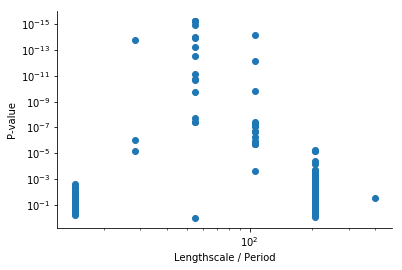

In [53]:
plt.loglog()
plt.scatter(results.l, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Lengthscale / Period')
plt.ylabel('P-value');

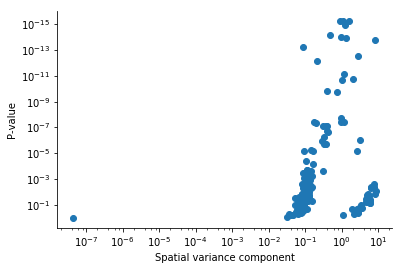

In [54]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('P-value');

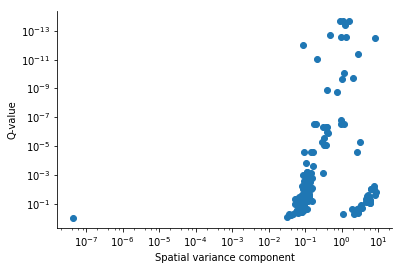

In [55]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('Q-value');

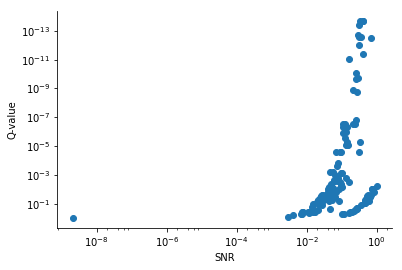

In [56]:
plt.loglog()
plt.scatter(1./results.max_delta, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('SNR')
plt.ylabel('Q-value');

In [57]:
results.query('qval < 0.05').shape

(92, 18)

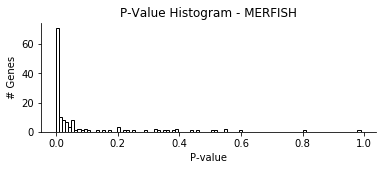

In [58]:
figsize(6, 2)
plt.hist(results.query('pval < 1.')['pval'], bins=100, color='w', ec='k');
plt.title('P-Value Histogram - MERFISH')
plt.ylabel('# Genes')
plt.xlabel('P-value');
# plt.ylim(ymax=400)

In [59]:
ms_results.model.value_counts()

SE        62
PER       21
linear     9
Name: model, dtype: int64

In [60]:
N = 5
top_per_ls = ms_results.query('qval < 0.05') \
                  .sort_values('qval', ascending=True) \
                  .groupby(['model', 'l']) \
                  .head(N) \
                  .sort_values(['l', 'qval'], ascending=[True, True])
                
top_per_ls

,BIC,FSV,LLR,M,g,l,max_delta,max_ll,max_mu_hat,max_s2_t_hat,...,n,s2_FSV,s2_logdelta,time,PER_prob,SE_prob,linear_prob,pval,qval,max_ll_null
33,734.408916,0.493937,9.172251,4,HERC2,14.490174,1.024034,-353.279971,-4.355470,7.576619,...,1056,0.002803,0.052512,0.001123,2.861740e-04,9.997024e-01,1.139789e-05,2.457122e-03,6.415819e-03,-362.452222
30,1464.841428,0.446784,7.108275,4,AFAP1,14.490174,1.237594,-718.496227,-4.914279,8.920527,...,1056,0.003070,0.058547,0.000938,8.060854e-02,8.811224e-01,3.826910e-02,7.672891e-03,1.567939e-02,-725.604502
35,1350.547520,0.406597,5.991232,4,POLQ,14.490174,1.458701,-661.349273,-4.920365,8.256945,...,1056,0.003642,0.072143,0.001076,3.244041e-03,9.902144e-01,6.541554e-03,1.437715e-02,2.632700e-02,-667.340505
34,1360.301630,0.345980,5.572456,4,PAPPA,14.490174,1.889391,-666.226328,-4.079214,4.971344,...,1056,0.002484,0.054523,0.000982,1.852006e-02,9.667229e-01,1.475700e-02,1.824515e-02,3.192037e-02,-671.798784
31,1385.104416,0.386644,5.418595,4,ANKH,14.490174,1.585562,-678.627721,-4.180206,5.737177,...,1056,0.003411,0.069451,0.001059,3.568854e-04,9.793075e-01,2.033560e-02,1.992339e-02,3.424459e-02,-684.046316
37,2454.467251,0.401525,58.663360,4,CENPF,28.116048,1.485120,-1213.309139,-6.898914,8.059880,...,1056,0.000053,0.001052,0.001134,1.392997e-41,1.000000e+00,3.963544e-39,1.876277e-14,3.306938e-13,-1271.972498
38,1194.271943,0.246855,23.890163,4,PRKCA,28.116048,3.039939,-583.211485,-4.837368,3.081164,...,1056,0.000070,0.002110,0.001530,1.332596e-11,1.000000e+00,1.875587e-18,1.019916e-06,5.136004e-06,-607.101648
36,904.730806,0.231011,20.307930,4,CBX5,28.116048,3.316767,-438.440916,-4.578621,2.655469,...,1056,0.000094,0.003079,0.001740,1.147114e-16,1.000000e+00,2.424521e-15,6.592677e-06,2.655907e-05,-458.748846
43,855.424403,0.245010,71.000967,4,FASN,54.555049,3.035502,-413.787714,-4.014640,0.888248,...,1056,0.000047,0.001440,0.001351,1.375312e-32,1.000000e+00,2.255349e-59,5.551115e-16,1.956768e-14,-484.788681
50,732.310281,0.281596,72.673145,4,SPTBN1,54.555049,2.513125,-352.230653,-4.411110,1.099691,...,1056,0.000053,0.001391,0.001254,1.442594e-39,1.000000e+00,1.346459e-55,5.551115e-16,1.956768e-14,-424.903798


In [61]:
top_per_ls.shape

(43, 21)

In [62]:
import NaiveDE

dfm = NaiveDE.stabilize(df.T).T
res = NaiveDE.regress_out(sample_info, dfm.T, 'np.log(cytoplasmArea)').T

In [63]:
from sklearn.preprocessing import scale

In [64]:
model_colors = {'SE': 'C0', 'PER': 'C1'}

/Users/vale/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


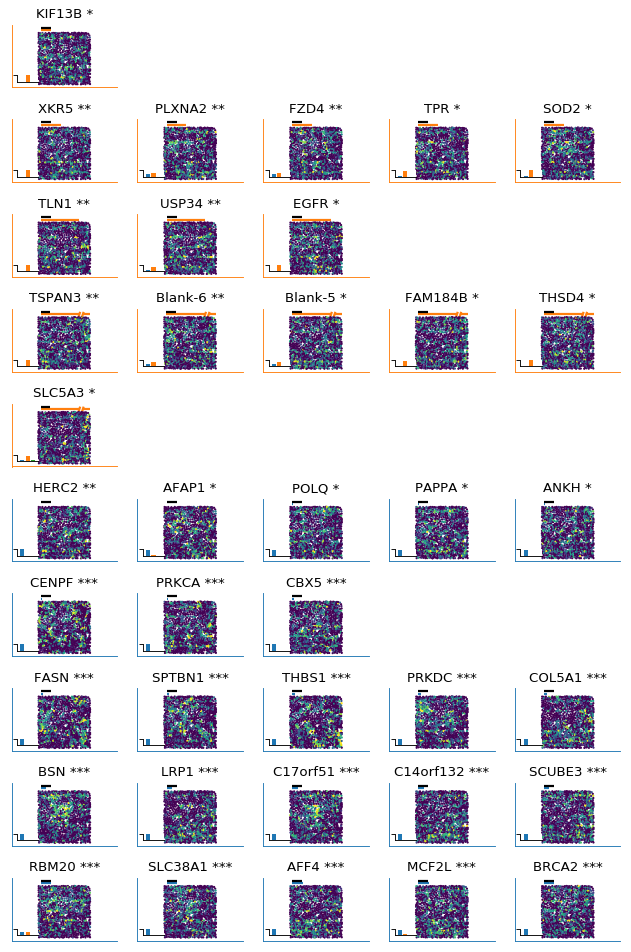

In [65]:
plt.figure(figsize=(8, 12), dpi=80)

N = 5
N_rows = top_per_ls['l'].unique().shape[0]
for j, T in enumerate(top_per_ls.groupby(['model', 'l'])):
    _, group = T
    for i, idx in enumerate(group.index):
        r = top_per_ls.loc[idx]
        ax = plt.subplot(N_rows, N, j * N + i + 1)
        
        plt.scatter(sample_info.abs_X, sample_info.abs_Y,
                    c=scale(res[r['g']], with_std=True), s=1, vmin=0, vmax=2, rasterized=True);
        
        s = ' *'
        if r['qval'] < 0.01:
            s = ' **'

        if r['qval'] < 0.001:
            s = ' ***'

        plt.title(r['g'] + s)
        
        plt.xticks([])
        plt.yticks([])
        plt.hlines(700, -400, -200, lw=2)
        if -400 + r['l'] < 600:
            plt.hlines(650, -400, -400 + r['l'], lw=2, color=model_colors[r['model']], zorder=0)
        else:
            plt.hlines(650, -400, 380, lw=2, color=model_colors[r['model']], zorder=0)
            plt.plot([380 - 10, 380 + 10], [620, 680], lw=2, color=model_colors[r['model']], zorder=0)
            plt.plot([450 - 10, 450 + 10], [620, 680], lw=2, color=model_colors[r['model']], zorder=0)
            plt.hlines(650, 450, 600, lw=2, color=model_colors[r['model']], zorder=0)
            
        for spine in ax.spines.values():
            spine.set_edgecolor(model_colors[r['model']])
        
        plt.axis('equal')
        
        # Make insert with model probabilities
        ins_ax = inset_axes(ax, width='20%', height='10%', loc=3)
        plt.bar((1, 2, 3), top_per_ls.loc[idx][['SE_prob', 'PER_prob', 'linear_prob']], color=['C0', 'C1', 'C2'])
        plt.ylim(0, 1);
        plt.xticks([], [])
        plt.xlim(-0.0, 4)
        plt.yticks([1], ['']);

plt.tight_layout()
plt.savefig('top_MF_genes_per_ls.pdf')

In [20]:
blank_genes = results[results.g.str.startswith('Blank-')]['g'].tolist()

In [21]:
len(blank_genes)

10

In [22]:
N = 3
top_per_ls = ms_results.query('g not in @blank_genes and qval < 1e-4') \
                  .sort_values('qval', ascending=True) \
                  .groupby(['model', 'l']) \
                  .head(N) \
                  .sort_values(['l', 'qval'], ascending=[True, True])

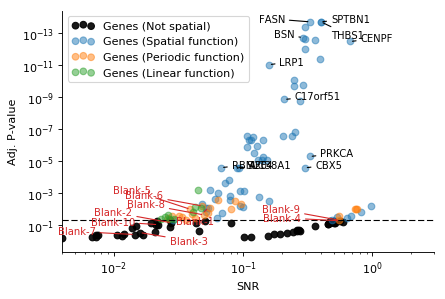

In [23]:
plt.figure(figsize=(6, 4), dpi=80)

plt.xscale('log')
plt.yscale('log')


tmp = results.query('qval > 0.05')
plt.scatter(1./ tmp['max_delta'], tmp['qval'],
            alpha=0.9, rasterized=True, label='Genes (Not spatial)', marker='o', color='k');


tmp = ms_results.query('model == "SE"')
plt.scatter(1./ tmp['max_delta'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (Spatial function)', marker='o', color='C0');

tmp = ms_results.query('model == "PER"')
tmp = tmp.drop('max_delta', 1).merge(results[['g', 'max_delta']], on='g')
plt.scatter(1./ tmp['max_delta'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (Periodic function)', marker='o', color='C1');

tmp = ms_results.query('model == "linear"')
tmp = tmp.drop('max_delta', 1).merge(results[['g', 'max_delta']], on='g')
plt.scatter(1./ tmp['max_delta'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (Linear function)', marker='o', color='C2');

# Annotate negative controls
tmp = results.query('g in @blank_genes')

x_offsets = {'Blank-3': 3e-1,
             'Blank-10': 1.5e0,
             'Blank-1': 9e-1}
y_offsets = {'Blank-3': 2e-1,
             'Blank-5': 1e1,
             'Blank-1': 1e-1,
             'Blank-4': 1e0,
             'Blank-10': 1,
             'Blank-7': 1}
for i, r in tmp.iterrows():
    xy = (1./r['max_delta'], r['qval'])
    xyt = (xy[0] / x_offsets.get(r['g'], 2),
           xy[1] / y_offsets.get(r['g'], 3),)
    plt.annotate(r['g'], xy, xyt, color='tab:red', horizontalalignment='right',
                 arrowprops={'arrowstyle': '-', 'color': 'tab:red'}, size=9)
    
# Annotate top genes
x_offsets = {'FASN': 4e-1,
             'BSN': 6e-1,
             'GTF3C4': 6e-1}
y_offsets = {'THBS1': 1e-1,
             'CDYL2': 1e-1,
             'GTF3C4': 5e0,
             'BRCA2': 3e-1}
for i, r in top_per_ls.iterrows():
    xy = (1./r['max_delta'], r['qval'])
    xyt = (xy[0] * x_offsets.get(r['g'], 1.2),
           xy[1] / y_offsets.get(r['g'], 1),)
    plt.annotate(r['g'], xy, xyt, color='k', arrowprops={'arrowstyle': '-'}, size=9)


plt.xlim(4e-3, 3e0)
plt.axhline(0.05, ls='--', c='k', lw=1)
plt.xlabel('SNR');
plt.ylabel('Adj. P-value');
plt.gca().invert_yaxis()

plt.legend(scatterpoints=3, loc='upper left');

plt.savefig('sigma_pval_MF.pdf', bbox_inches='tight');

In [24]:
import SpatialDE.plot

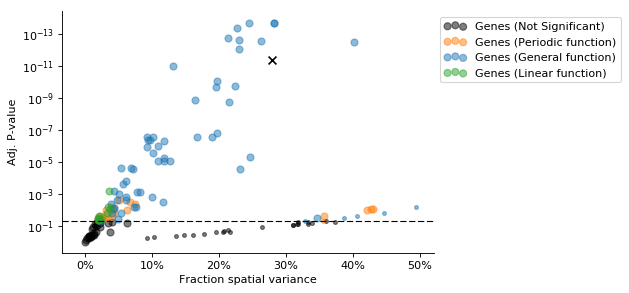

In [25]:
plt.figure(figsize=(6, 4), dpi=80)

SpatialDE.plot.FSV_sig(results, ms_results)

In [26]:
', '.join(results.g.tolist())

'AFAP1, AKAP11, ANKH, ARL10, BUB3, Blank-4, Blank-9, CBL, CDYL2, CEMIP, DIEXF, DOPEY1, DSEL, FAF2, FAM208B, FBN1, FYCO1, FZD4, GPR107, HERC2, KIF13B, NKTR, NRIP1, PAPPA, PLXNA2, POLQ, PRDM2, PROSER1, SIPA1L3, SKP1, SLC5A3, SULT1C2, UBR5, CBX5, CENPF, PRKCA, AMOTL1, ANKRD52, CKAP5, COL5A1, CRTAP, FASN, FBN2, MALAT1, MYH10, PRKDC, PRPF8, SMARCA5, SPTBN1, SRRM2, THBS1, log_total_count, BSN, C14orf132, C17orf51, CEP250, CHST3, CREBBP, DYNC1H1, GTF3C4, LRP1, LUZP1, NHSL2, NOTCH2, RP4-671O14.6, SCUBE3, SLC7A11, ZNF592, AFF4, AGAP1, AGO3, AGPS, AHDC1, ALPK2, ASCC3, BRCA2, Blank-1, Blank-10, Blank-2, Blank-3, Blank-5, Blank-6, Blank-7, Blank-8, CCDC113, CNR2, DIP2B, DNAJC13, EGFR, FAM184B, FZD5, HEATR5B, IGF2R, IL17RA, ITPR2, KIAA1147, KIAA1462, KLHL9, KPNA4, LMTK2, MAN1A2, MCF2L, MED14, PHIP, PIK3CA, PLXNA1, PRRC2B, PTPN14, RAB3B, RAD51D, RBM20, RNF152, RNF169, SAMD12, SLC35B4, SLC38A1, SLC9A2, SMIM5, SOD2, STARD9, THSD4, TLN1, TMOD2, TNRC6A, TPR, TSPAN3, TSTD2, TTPAL, UBR2, UMPS, USP24, USP3

In [27]:
moffit_genes_plus = ['CENPF', 'CKAP5', 'POLQ', 'BUB3']
moffit_genes_minus = ['THBS1', 'FBN2', 'TSPAN3']

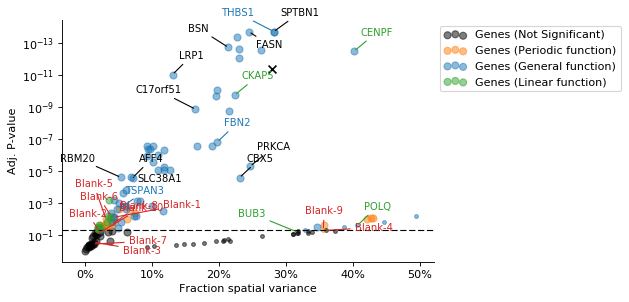

In [28]:
plt.figure(figsize=(6, 4), dpi=80)

SpatialDE.plot.FSV_sig(results, ms_results)
size_stats = results.query('g == "log_total_count"')
# plt.scatter(size_stats['FSV'], size_stats['qval'], marker='x', c='k', s=50)

# Annotate negative controls
tmp = results.query('g in @blank_genes')

x_offsets = {'Blank-3': 0.1,
             'Blank-10': 0.1,
             'Blank-1': 0.1,
             'Blank-9': 0.03,
             'Blank-4': 0.1,
             'Blank-8': 0.07,
             'Blank-1': 0.13,
             'Blank-7': 0.11}
y_offsets = {'Blank-3': 2e-1,
             'Blank-5': 1e2,
             'Blank-1': 4e0,
             'Blank-4': 1e0,
             'Blank-10': 3e1,
             'Blank-7': 1}
for i, r in tmp.iterrows():
    xy = (r['FSV'], r['qval'])
    xyt = (xy[0] + x_offsets.get(r['g'], 0.01),
           xy[1] / y_offsets.get(r['g'], 1e1),)
    plt.annotate(r['g'], xy, xyt, color='tab:red', horizontalalignment='right',
                 arrowprops={'arrowstyle': '-', 'color': 'tab:red'}, size=9)
    

# Annotate highly dividing genes
x_offsets = {'THBS1': -0.08,
             'BSN': -0.06,
             'GTF3C4': 0.1,
             'C17orf51': -0.09,
             'GTF3C4': -0.09,
             'RBM20': -0.09,
             'BRCA2': -0.09,
             'BUB3': -0.09}
y_offsets = {'THBS1': 1e1,
             'CDYL2': 4e-1,
             'GTF3C4': 5e0,
             'BRCA2': 1e1,
             'FASN': 1e-1}
tmp = results.query('g in @moffit_genes_plus')
for i, r in tmp.iterrows():
    xy = (r['FSV'], r['qval'])
    xyt = (xy[0] + x_offsets.get(r['g'], 0.01),
           xy[1] / y_offsets.get(r['g'], 1e1),)
    plt.annotate(r['g'], xy, xyt, color='tab:green', arrowprops={'arrowstyle': '-', 'color': 'tab:green'}, size=9)
    
# Annotate lowly dividing genes
x_offsets = {'THBS1': -0.08,
             'BSN': -0.06,
             'GTF3C4': 0.1,
             'C17orf51': -0.09,
             'GTF3C4': -0.09,
             'RBM20': -0.09,
             'BRCA2': -0.09}
y_offsets = {'THBS1': 1e1,
             'CDYL2': 4e-1,
             'GTF3C4': 5e0,
             'BRCA2': 1e1,
             'FASN': 1e-1}
tmp = results.query('g in @moffit_genes_minus')
for i, r in tmp.iterrows():
    xy = (r['FSV'], r['qval'])
    xyt = (xy[0] + x_offsets.get(r['g'], 0.01),
           xy[1] / y_offsets.get(r['g'], 1e1),)
    plt.annotate(r['g'], xy, xyt, color='tab:blue', arrowprops={'arrowstyle': '-', 'color': 'tab:blue'}, size=9)
    
    
# Annotate top genes
x_offsets = {'THBS1': -0.08,
             'BSN': -0.06,
             'GTF3C4': 0.1,
             'C17orf51': -0.09,
             'GTF3C4': -0.09,
             'RBM20': -0.09,
             'BRCA2': -0.09}
y_offsets = {'THBS1': 1e1,
             'CDYL2': 4e-1,
             'GTF3C4': 5e0,
             'BRCA2': 1e1,
             'FASN': 1e-1,
             'SLC38A1': 5e-1}
tmp = results.query('g in @top_per_ls.g and g not in @moffit_genes_minus and g not in @moffit_genes_plus')
for i, r in tmp.iterrows():
    xy = (r['FSV'], r['qval'])
    xyt = (xy[0] + x_offsets.get(r['g'], 0.01),
           xy[1] / y_offsets.get(r['g'], 1e1),)
    plt.annotate(r['g'], xy, xyt, color='k', arrowprops={'arrowstyle': '-', }, size=9)


plt.savefig('FSV_pval_MF.pdf', bbox_inches='tight');

In [29]:
results.query('qval < 0.05').shape

(92, 18)

In [30]:
results.query('qval < 0.05').shape[0] / results.shape[0]

0.6524822695035462

In [31]:
results.query('qval < 0.05 & g in @blank_genes').shape

(5, 18)

In [32]:
results.query('qval < 0.05 & g in @blank_genes').shape[0] / results.query('g in @blank_genes').shape[0]

0.5

In [33]:
fdrs = 10 ** np.linspace(0, -8)
total_pct = []
blank_pct = []
for fdr in fdrs:
    total_pct.append(results.query('qval < @fdr').shape[0] / results.shape[0])
    blank_pct.append(results.query('qval < @fdr & g in @blank_genes').shape[0] / results.query('g in @blank_genes').shape[0])

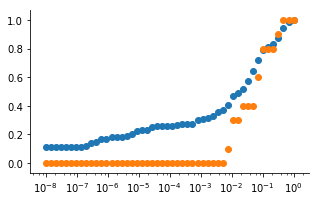

In [34]:
figsize(5, 3)
plt.xscale('log')
plt.scatter(fdrs, total_pct);
plt.scatter(fdrs, blank_pct);

In [35]:
results.shape

(141, 18)

In [36]:
results['bpval'] = results.pval * results.shape[0]

In [37]:
fdrs = 10 ** np.linspace(0, -8)
total_pct = []
blank_pct = []
for fdr in fdrs:
    total_pct.append(results.query('bpval < @fdr').shape[0] / results.shape[0])
    blank_pct.append(results.query('bpval < @fdr & g in @blank_genes').shape[0] / results.query('g in @blank_genes').shape[0])

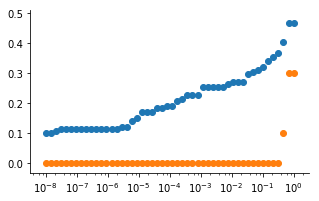

In [38]:
figsize(5, 3)
plt.xscale('log')
plt.scatter(fdrs, total_pct);
plt.scatter(fdrs, blank_pct);

In [39]:
results['bp_blanks'] = results.pval * 10

In [40]:
results['bp_rna'] = results.pval * (results.shape[0] - 10)

In [41]:
fdrs = 10 ** np.linspace(2, -10)
total_pct = []
blank_pct = []
for fdr in fdrs:
    total_pct.append(results.query('bp_rna < @fdr').shape[0] / results.shape[0])
    blank_pct.append(results.query('bp_blanks < @fdr & g in @blank_genes').shape[0] / results.query('g in @blank_genes').shape[0])

In [42]:
results.shape[0] - 10

131

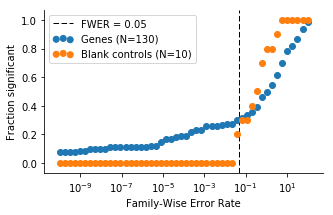

In [43]:
figsize(5, 3)
plt.xscale('log')
plt.scatter(fdrs, total_pct, label='Genes (N=130)');
plt.scatter(fdrs, blank_pct, label='Blank controls (N=10)');
plt.axvline(0.05, lw=1, ls='--', c='k', zorder=0, label='FWER = 0.05');
plt.legend(scatterpoints=3);

plt.ylabel('Fraction significant');
plt.xlabel('Family-Wise Error Rate');

plt.savefig('MF-FWER.pdf', bbox_inches='tight');

In [44]:
results.query('bp_blanks < 0.05 & g in @blank_genes')

,FSV,M,g,l,max_delta,max_ll,max_mu_hat,max_s2_t_hat,model,n,...,s2_logdelta,time,BIC,max_ll_null,LLR,pval,qval,bpval,bp_blanks,bp_rna
76,0.042966,4,Blank-1,205.398037,18.558244,-728.438416,-3.734378,0.093120,SE,1056,...,0.125081,0.001769,1484.725806,-736.997581,8.559165,0.003438,0.008216,0.484740,0.034379,0.450361
80,0.031503,4,Blank-5,205.398037,25.614000,-693.180259,-3.749111,0.085449,SE,1056,...,0.102821,0.002480,1414.209491,-701.160850,7.980591,0.004728,0.010250,0.666669,0.047282,0.619388
81,0.038852,4,Blank-6,205.398037,20.611487,-616.849123,-3.534902,0.080177,SE,1056,...,0.126994,0.001889,1261.547219,-626.037892,9.188769,0.002435,0.006416,0.343341,0.024350,0.318991
